In [84]:
# Karl Roth
# Nuclear, Plasma, and Radiological Engineering
# 1828
import os 
from geopandas import GeoSeries, GeoDataFrame, read_file, gpd
from matplotlib import pyplot as plt

%matplotlib inline
input_file = 'WORLD.shp'

### Question 1: 

In [85]:
# Read the shape file into the variable
# and view the table to see the headers.
worldDF = gpd.read_file(input_file)

#Check that it imports properly
worldDF[:5]

,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN,geometry
0,44,AC,AG,ATG,17.078,-61.783,Antigua and Barbuda,83039,19,29,28,"(POLYGON ((-61.686668 17.02444100000014, -61.7..."
1,238174,AG,DZ,DZA,28.163,2.632,Algeria,32854159,2,15,12,"POLYGON ((2.96361 36.802216, 2.981389 36.80693..."
2,8260,AJ,AZ,AZE,40.430,47.395,Azerbaijan,8352021,142,145,31,(POLYGON ((45.08332100000001 39.76804400000015...
3,2740,AL,AL,ALB,41.143,20.068,Albania,3153731,150,39,8,"POLYGON ((19.436214 41.021065, 19.450554 41.05..."
4,2820,AM,AM,ARM,40.534,44.563,Armenia,3017661,142,145,51,(POLYGON ((45.57305100000013 40.63248800000008...


In [86]:
# Sort the values in a descending fashion
# and display the first 5 entries
worldDF.sort_values(by="POP2005", inplace=True, ascending=False)
worldDF[:5]

,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN,geometry
29,932743,CH,CN,CHN,33.420,106.514,China,1312978855,142,30,156,"(POLYGON ((110.524147 19.13444100000004, 110.5..."
82,297319,IN,IN,IND,21.000,78.500,India,1134403141,142,34,356,(POLYGON ((93.91276600000015 7.028609999999958...
208,915896,US,US,USA,39.622,-98.606,United States,299846449,19,21,840,(POLYGON ((-75.17028799999997 19.9313890000000...
224,181157,ID,ID,IDN,-0.976,114.252,Indonesia,226063044,142,35,360,"(POLYGON ((123.214706 -10.81222200000002, 123...."
20,845942,BR,BR,BRA,-10.772,-53.089,Brazil,186830759,19,5,76,(POLYGON ((-48.55055999999996 -27.821391999999...


### Question 2:

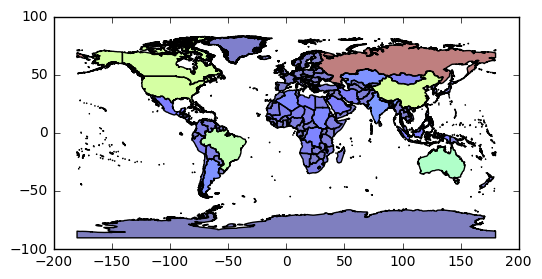

In [87]:
# Chloropleth map based on Area
worldDF.plot(column="AREA")

### Question 3:

In [88]:
usaDF = worldDF.loc[worldDF['NAME'] == 'United States']
usaDF

,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN,geometry
208,915896,US,US,USA,39.622,-98.606,United States,299846449,19,21,840,(POLYGON ((-75.17028799999997 19.9313890000000...


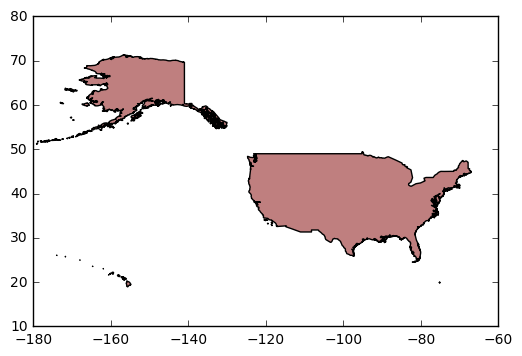

In [89]:
#Plot the United States
fig, ax = plt.subplots()

# Reset the bounds for asthetic reasons
# This removes the Pacific Island Terretories 
# This map focuses on the 50 states.
ax.set_ylim([10,80])
ax.set_xlim([-180,-60])
usaDF.plot(ax=ax)

### Question 4:

In [90]:
input_file = 'us_county.shp'
countiesDF = gpd.read_file(input_file)
countiesDF[:3]

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry
0,0500000US39131,1140324458,9567612,131,01074078,39131,06,Pike,39,"POLYGON ((-83.35353099999999 39.197585, -82.78..."
1,0500000US46003,1834813753,11201379,003,01266983,46003,06,Aurora,46,"POLYGON ((-98.807771 43.935223, -98.331508 43...."
2,0500000US55035,1652211310,18848512,035,01581077,55035,06,Eau Claire,55,"POLYGON ((-91.65045499999999 44.855951, -90.92..."


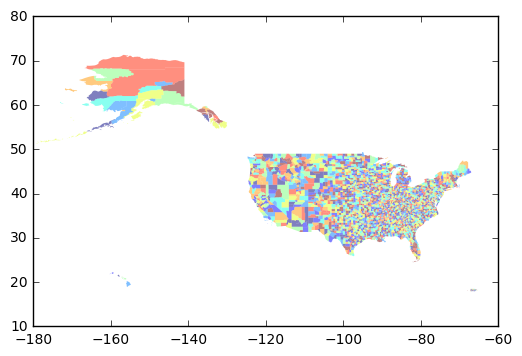

In [91]:
fig, ax = plt.subplots()
ax.set_ylim([10,80])
ax.set_xlim([-180,-60])
countiesDF.plot(ax = ax,linewidth=0)

### Question 5:

In [92]:
# The world dataset uses WGS84
worldDF.crs

{'init': 'epsg:4326'}

In [93]:
# There are 246 records
worldDF["ISO2"].count()

246

In [94]:
# The counties dataset uses NAD83
countiesDF.crs

{'init': 'epsg:4269'}

In [95]:
#There are 3220 records
countiesDF['NAME'].count()

3220

### Question 6:

In [96]:
# Reproject counties into 4326
countiesDF = countiesDF.to_crs(epsg=4326)

In [97]:
# Check that reprojected properly
countiesDF.crs

{'init': 'epsg:4326', 'no_defs': True}

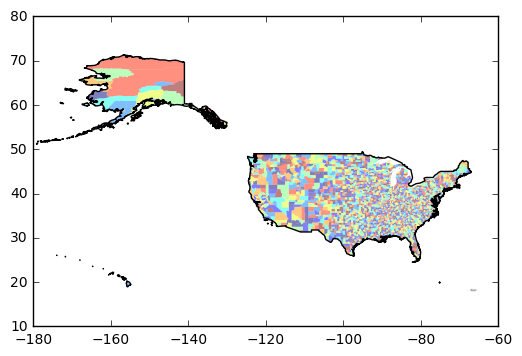

In [98]:
#Plotting using matplotlib objecfts
fig, ax = plt.subplots()

ax.set_ylim([10,80])
ax.set_xlim([-180,-60])

usaDF.plot(ax=ax, color='white',
 edgecolor='black')
countiesDF.plot(ax=ax, linewidth=0)

### Question 7:

In [106]:
subregions = worldDF[['SUBREGION','geometry','POP2005']]
result = subregions.dissolve(by='SUBREGION',aggfunc = 'sum')
result

,geometry,POP2005
SUBREGION,,
0,"(POLYGON ((-149.83197 -76.66445899999991, -149...",0
5,(POLYGON ((-67.49305699999996 -55.829169999999...,333227518
11,(POLYGON ((-9.892223000000001 -40.390839000000...,219242207
13,(POLYGON ((-82.01501499999995 9.12638899999996...,137624538
14,"(POLYGON ((63.466385 -19.73583600000001, 63.36...",292538884
15,(POLYGON ((37.26860800000003 20.75111000000004...,189562020
17,"(POLYGON ((11.750832 -16.75527999999991, 11.77...",112505212
18,(POLYGON ((37.85083000000009 -46.9569469999999...,54899638
21,(POLYGON ((-155.0055849999999 19.3288800000000...,332244951


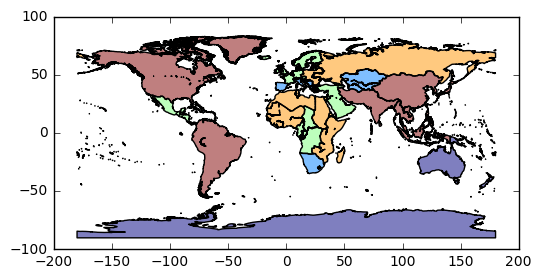

In [107]:
result.plot(column = 'POP2005', 
               scheme='quantiles')